# Введение Машинное обучение
### Часть 2

https://scikit-learn.ru/user_guide/

# Соревнование Kaggle "Titanic: Machine Learning from Disaster"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_main = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_main.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_prep_x = df_main.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
df_prep_x_tst = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_prep_y = df_main['Survived']

get_dummies - создаем "индикаторные" переменные 1 или 0, тем самым кодируя данные

sex [male, female, ...] -> sex_male [1, 0, 1, ...], sex_female [0, 1, 0, ...]

In [5]:
def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    return df_num

In [7]:
df_prep_x_num = prepare_num(df_prep_x)
df_prep_x_num_tst = prepare_num(df_prep_x_tst)
df_prep_x_num.head()

,Age,SibSp,Parch,Fare,female,male,Emb_C,Emb_Q,Emb_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


In [8]:
# Заполняем пустые значения
df_prep_x_num = df_prep_x_num.fillna(df_prep_x_num.median())
df_prep_x_num_tst = df_prep_x_num_tst.fillna(df_prep_x_num.median())

Производим нормализацию (Normalization) данных перед использованием в Модели (Model) Машинного обучения (ML)

Мы не можем использовать метод fit () для тестового набора данных,поскольку это может привести к смещению тестового набора данных.

https://stackoverflow.com/questions/23838056/what-is-the-difference-between-transform-and-fit-transform-in-sklearn

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(df_prep_x_num)
scaled_x_tst = scaler.transform(df_prep_x_num_tst)

# Общий синтаксис моделей sklearn

Конструктор с заданием параметров
```python
model = ...
```

Обучение модели (генерации параметров модели обучения из обучающих данных)
```python
model.fit(X_train, y_train)
```
Предсказание результатов
```python
y_predict = model.predict(X_test)
```


## Обучение без учителя

Конструктор с заданием параметров
```python
model = ...
```

Обучение модели
```python
model.fit(X_train)
```
Трансформация данных (параметры, созданные из fit()метода, применяются к модели для создания преобразованного набора данных)
```python
y_predict = model.transform(X_test)
```
Обучение+трансформация данных
```python
y_predict = model.fit_transform(X_train)
```

## Пример:
## Z  = (x -μ )/ σ

__Fit()__: метод вычисляет параметры μ и σ и сохраняет их как внутренние объекты.
 __Transform()__: метод, использующий эти вычисляемые параметры, применяет преобразование к определенному набору данных.

# Метод главных компонент (PCA)

Метод главных компонент позволяет одновременно избавиться от сильно скоррелированных признаков, так как вектора базиса пространства, на которое они проецируются, будут ортогональными.

https://habr.com/ru/company/ods/blog/325654/

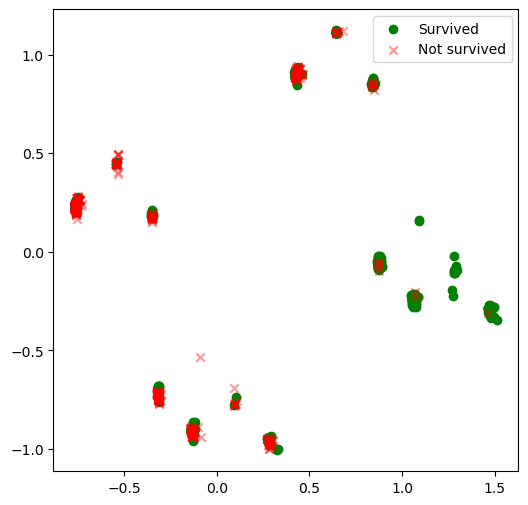

In [10]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
squeezed = model.fit_transform(scaled_x)

plt.figure(figsize=(6, 6))
plt.scatter(squeezed[df_prep_y == 1][:, 0], squeezed[df_prep_y == 1][:, 1], color='green', label='Survived')
plt.scatter(squeezed[df_prep_y == 0][:, 0], squeezed[df_prep_y == 0][:, 1], color='red', marker='x', alpha=0.4,
           label='Not survived')
plt.legend()
plt.show()

# t-SNE
t-SNE (t-distributed Stohastic Neighbor Embedding), метод отображения из многомерного признакового пространства на плоскость (или в 3D), чтобы точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие.

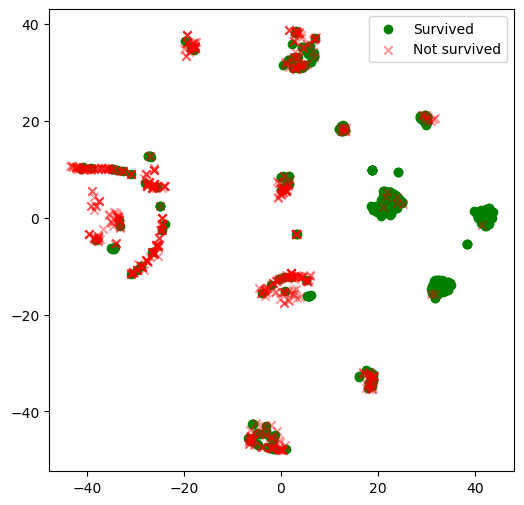

In [11]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2)
squeezed = model.fit_transform(scaled_x)

plt.figure(figsize=(6, 6))
plt.scatter(squeezed[df_prep_y == 1][:, 0], squeezed[df_prep_y == 1][:, 1], color='green', label='Survived')
plt.scatter(squeezed[df_prep_y == 0][:, 0], squeezed[df_prep_y == 0][:, 1], color='red', marker='x', alpha=0.4,
           label='Not survived')
plt.legend()
plt.show()

# Метод ближайших соседей (k-NN)

Метод k-ближайших соседей (k-nearest neighbors algorithm) — метрический алгоритм для автоматической классификации объектов или регрессии.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:
1. Вычислить расстояние до каждого из объектов обучающей выборки
2. Отобрать  объекты обучающей выборки, расстояние до которых минимально
3. Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди ближайших соседей

https://habr.com/ru/company/ods/blog/322534/

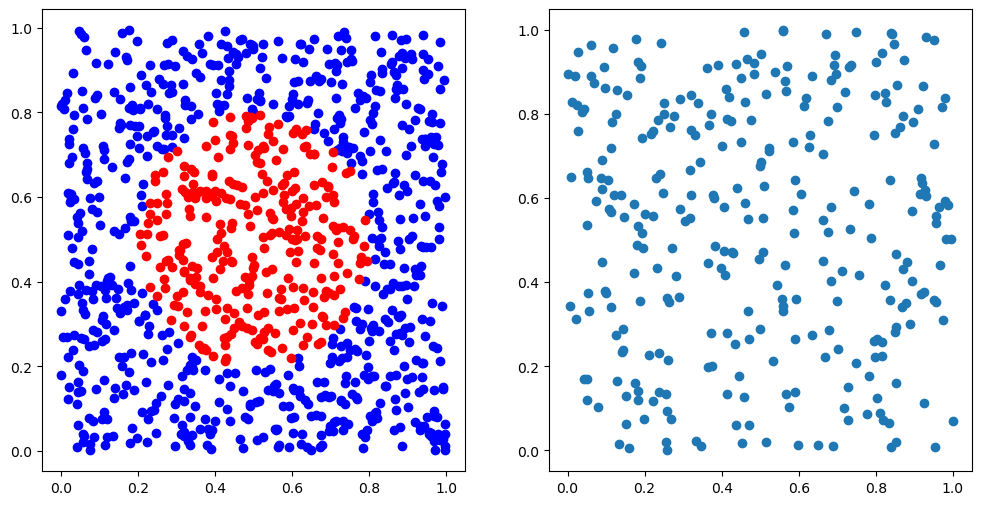

In [12]:
# Сгенерируем данные с 2 признаками
np.random.seed(18182)
data_test = np.random.rand(300, 2)
data_train = np.random.rand(1000, 2)
# Обозначим как позитивные данные в радиусе 0.3 от точки (0.5; 0.5)
label_train = (((data_train - 0.5) ** 2).sum(axis=1) < 0.3 ** 2).astype(float)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_train[:, 0][label_train == 0], data_train[:, 1][label_train == 0], color='blue')
plt.scatter(data_train[:, 0][label_train == 1], data_train[:, 1][label_train == 1], color='red')
plt.subplot(1, 2, 2)
plt.scatter(data_test[:, 0], data_test[:, 1])
plt.show()

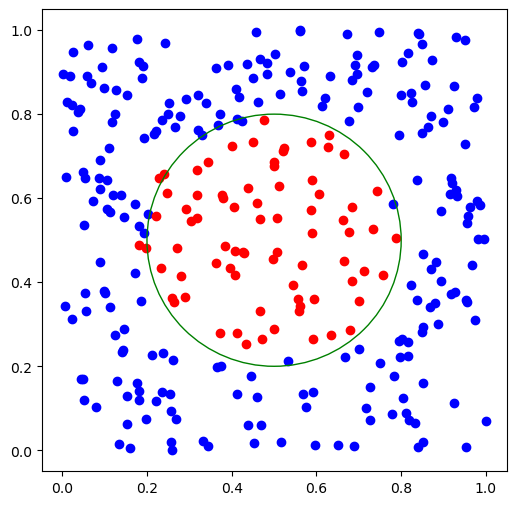

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# Дерево решений (Decision Tree)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(df_prep_x_num, df_prep_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

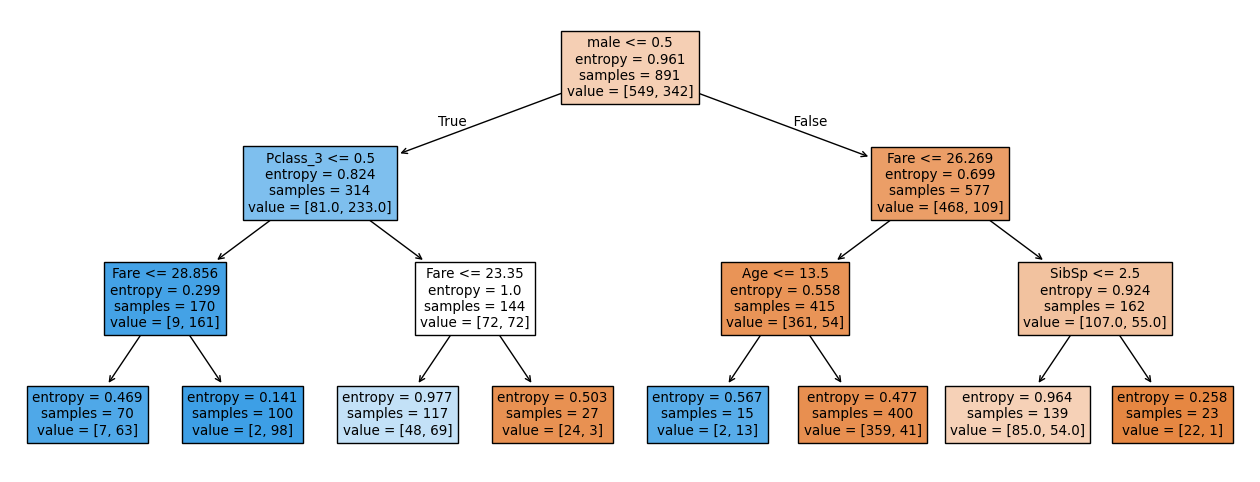

In [15]:
plt.figure(figsize=(16, 6))
tree.plot_tree(model, feature_names=df_prep_x_num.columns, filled=True)
plt.show()

### Энтропия (степень хаоса или неопределенности в системе)
$$
S = -{\sum_{n}p_ilog_2p_i}
$$
n - число классов  
$p_i$ - вероятность i класса
$$
p_0 = {549 \over 891} = 0.6161
$$  

$$
p_1 = {342 \over 891} = 0.3838
$$


$$
S_0 =  -p_0log_2p_0 - p_1log_2p_1 = 0.9607
$$

### Прирост информации
$$
IG = S_0 - \sum_q{N_i\over N}S_i
$$
q - число групп после разбиения  
$N_i$ – число элементов выборки

$$
IG = 0.9607 - {314\over891}*0.824 - {577\over891}*0.699 = 0.2176
$$

### Важность признаков

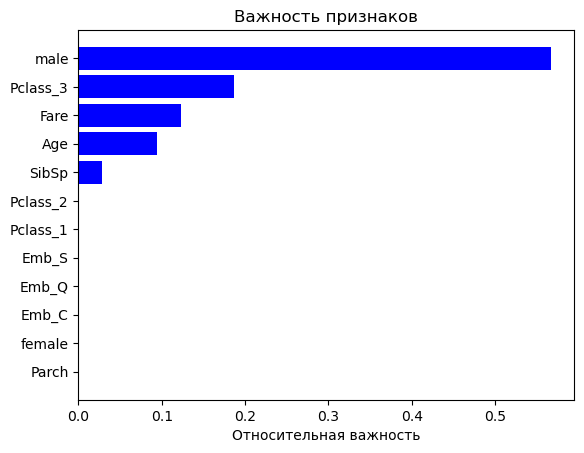

In [16]:
importances = model.feature_importances_
features = df_prep_x_num.columns
# Добавление сортировки по важности
indices = np.argsort(importances)

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

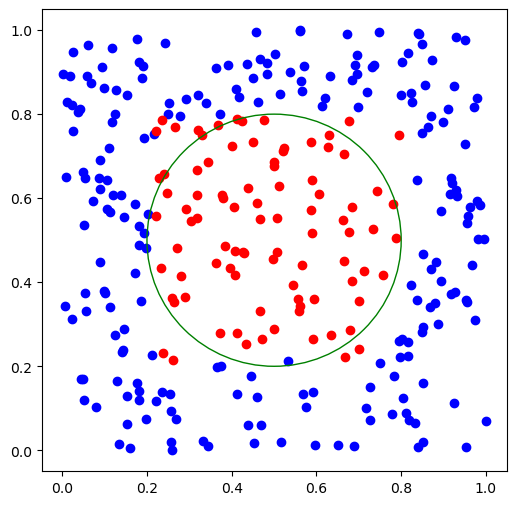

In [17]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

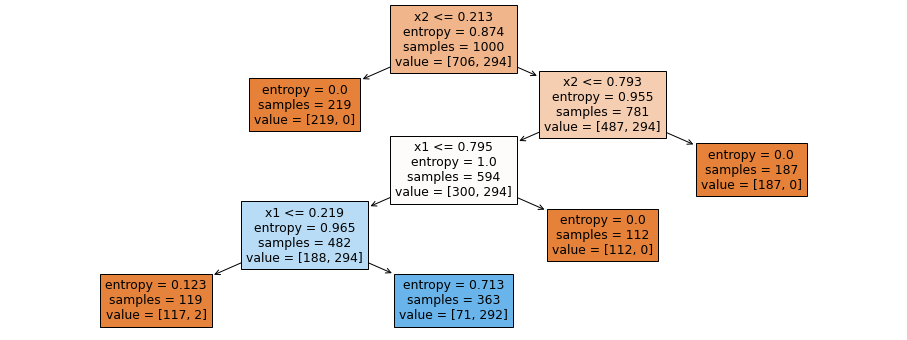

In [16]:
plt.figure(figsize=(16, 6))
tree.plot_tree(model, feature_names=['x1', 'x2'], filled=True)
plt.show()

# Линейная регрессия

<img src="images/LessonsI/extrap.png" alt="Synaps" height=30% width=30%>

$$
y = w_0 + \sum_{i=1}^m w_ix_i
$$

$$x_0 = 1$$

$$
y = \sum_{i=0}^m w_ix_i
$$

$$
\vec{y} = X \vec{w} + \epsilon
$$

$\vec{y}$ – объясняемая (или целевая) переменная  
$\vec{w}$ – вектор параметров модели (веса)  
X – матрица признаков  
$\epsilon$ –  случайная переменная, соответствующая случайной, непрогнозируемой ошибке модели

### Ошибка модели
Метод наименьших квадратов - минимизация среднеквадратичной ошибки между реальным значением зависимой переменной и прогнозом, выданным моделью:
$$
L(X, \vec{y}, \vec{w}) = {1\over2n}\sum_{i=1}^n(y_i-\vec{w}^T\vec{x}_i)^2 = {1\over2n} ||\vec y - X \vec w||_2^2
$$

$$
{\partial L \over \partial \vec w} = 0
$$

### Регуляризация
w может принимать большие значения, что приведёт к нестабильной оценке параметров модели, т.е. добавление нового наблюдения в набор тренировочных данных приведёт к совершенно другому решению. Одним из способов борьбы с этим является регуляризация. Один из вариантов - регуляризация Тихонова:
$$
L(X, \vec{y}, \vec{w}) = {1\over2n} ||\vec y - X \vec w||_2^2 + ||\Gamma \vec w || ^2
$$

$\Gamma$ - матрица Тихонова (коэффициент регуляризации)

https://habr.com/ru/company/ods/blog/323890/

In [3]:
# Пример
df_lr = pd.DataFrame(data={'x':[0.7, 1.3, 2.0, 2.9, 3.4, 5],
                           'y':[0.2, 0.3, 1.1, 1.9, 2.7, 3]})

In [4]:
from ipywidgets import interactive

def loss(m, b):
    df_lr['y_pred'] = m*df_lr['x'] + b
    df_lr['loss'] = np.absolute(df_lr['y']-df_lr['y_pred'])
    print('loss =', df_lr['loss'].mean())

def plot(m, b):
    plt.figure(2)
    x = np.linspace(0, 6, num=1000)
    plt.plot(x, m * x + b)
    plt.scatter(x=df_lr['x'], y=df_lr['y'])
    plt.ylim(-0.5, 3.4)
    plt.grid()
    plt.show()
    loss(m, b)

interactive_plot = interactive(plot, m=(-2.0, 2.0), b=(-3, 3, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_lr[['x']], df_lr[['y']])
f'm = {model.coef_} b = {model.intercept_}' 

'm = [[0.73836012]] b = [-0.34948496]'

# Логистическая регрессия

![sklearn clustering](https://habrastorage.org/r/w1560/getpro/habr/post_images/555/369/344/5553693449d97a6ccb730f4760a2eacd.png)

Линейный классификатор:
$$
a(\vec x) = sign(\vec w^Tx)
$$
sign() - функция, возвращающая знак своего аргумента  
$a(\vec x)$ - ответ классификатора (1 - целевой клас, -1 - отрицательный пример)  

Логистическая регрессия является частным случаем линейного классификатора, но она может выражать вероятность отнесения функции к положительному классу ($p_+$):
$$
p_+ = P(y_i = 1| \vec x_i, \vec w)
$$
P(X) - вероятность события X

$f(\vec x_i, \vec w) = \vec x_i \vec w = 0$ - разделяющая плоскость  
f > 0 - класс "+"  
f < 0 - класс "-"  
f = 0 - неопределённость  

Но данные функции имеют разные пределы:  
$f \in (-\infty ; \infty)$  
$P \in [0 ; 1]$

Введём функцию отношения вероятностей:
$$
OR(X) = {P(X) \over 1 - P(X)}
$$
$OR \in (0 ; \infty)$, а $ln(OR) \in (-\infty ; \infty)$

Таким образом
$log(OR_+) = \vec w^T \vec x_i $ или $OR_+ = e^{\vec w^T \vec x_i }$

$$
p_+ = {OR_+ \over 1 + OR_+} = {e^{\vec w^T \vec x_i } \over 1 + e^{\vec w^T \vec x_i }} = {1 \over 1 + e^{-\vec w^T \vec x_i }} = \sigma(\vec w^T \vec x_i )
$$
$\sigma(x)$ - сигмоид-функция 
![sigmoid](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

Вероятность отнесения функции к отрицательному классу:
$$
p_- = P(y_i = -1| \vec x_i, \vec w) = \sigma(-\vec w^T \vec x_i  )
$$

Обобщение:
$$
P(y = y_i| \vec x_i, \vec w) = \sigma(y_i\vec w^T \vec x_i  )
$$

In [6]:
# Пример
df_lgr = pd.DataFrame(data={'x':[0.7, 1.3, 2.0, 2.9, 3.4, 5],
                            'y':[0., 0., 1., 0., 1., 1]})

In [10]:
def loss_P(m, b):
    # Принцип максимального правдоподобия
    # Стараемся, чтобы "правдоподобия", рассчитанных для каждой точки
    # были максимальны
    df_lgr['y_pred'] = 1/(1 + np.exp(-(m * df_lgr['x'] + b)))
    # События независимы, поэтому их общая вероятность
    # равна произведению П P(y=y_i | x_i,w)
    df_lgr['P'] = df_lgr['y_pred'][df_lgr['y']==1] # вероятность, что y_i = 1
    df_lgr['P'][df_lgr['y']==0] = 1-df_lgr['y_pred']  # вероятность, что y_i = 0
    P=1
    for x in df_lgr['P']:
        P *= x
    print('П P_i =', P)

def loss_log_P(m, b):
    # Принцип максимального правдоподобия
    # Избавимся от произведения вероятностей -> Перейдём к сумме log-ов
    # Необходимо минимизировать выражение:
    df_lgr['y_pred'] = 1/(1 + np.exp(-(m * df_lgr['x'] + b)))
    df_lgr['log_P'] = np.log(df_lgr['y_pred'][df_lgr['y']==1])
    df_lgr['log_P'][df_lgr['y']==0] = np.log(1-df_lgr['y_pred'])
    print('SUM log(P_i) =', df_lgr['log_P'].sum())
    

def plot(m, b):
    plt.figure(2)
    x = np.linspace(0, 6, num=1000)
    plt.plot(x, (1/(1 + np.exp(-(m * x + b)))))
    plt.scatter(x=df_lgr['x'], y=df_lgr['y'])
    plt.ylim(-0.1, 1.2)
    plt.grid()
    plt.show()
    loss_P(m, b)
    loss_log_P(m, b)

interactive_plot = interactive(plot, m=(-1.0, 5.0), b=(-10, 0, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
# Ищем Максимум П P
# и минимум log(P)

interactive(children=(FloatSlider(value=2.0, description='m', max=5.0, min=-1.0), FloatSlider(value=-5.0, desc…

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df_lgr[['x']], df_lgr[['y']])
f'm = {model.coef_} b = {model.intercept_}' 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


'm = [[0.77756094]] b = [-1.94751025]'

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, solver='lbfgs')
model.fit(scaled_x, df_prep_y)

y_pred = model.predict(scaled_x_tst)
print('Классы:', y_pred[:4])
y_proba = model.predict_proba(scaled_x_tst)
print('Вероятности:\n', y_proba[:4])

Классы: [0 1 0 0]
Вероятности:
 [[0.85226449 0.14773551]
 [0.49909854 0.50090146]
 [0.72998682 0.27001318]
 [0.88306963 0.11693037]]


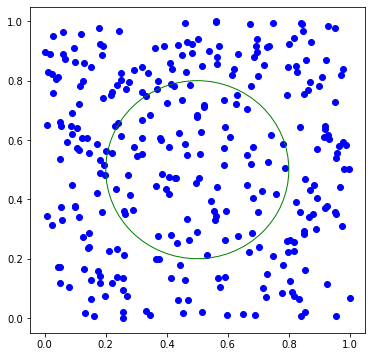

In [19]:
# В данном случае модель не смогла подобрать разделяющую гиперплоскость
model = LogisticRegression(C=0.1, solver='lbfgs')
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# Случайный лес
Алгоритм:
1. Сгенерировать подвыборку из данных
2. Построить решающее дерево  по подвыборке
3. Повторить шаги 1, 2 K раз
4. Результат принимается как результат большинства (классификация) или среднему (регрессия)

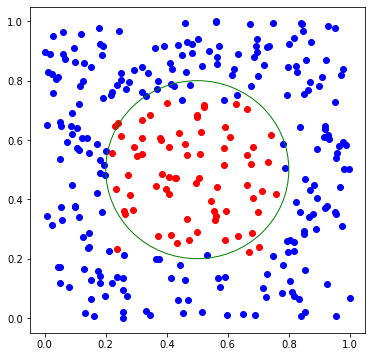

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, max_depth=4, criterion='entropy')
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# XGBoost
Алгоритм для K шага:
1. Сгенерировать подвыборку из данных
2. Построить решающее дерево  по подвыборке. Целевая величина $y - pred_{K-1}$, где $pred_{K-1}$ - предсказание комбинации прошлых деревьев
3. Добавить новое дерево к имеющемуся результату из комбинации прошлых деревьев так, чтобы минимизировать ошибку

[11:05:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


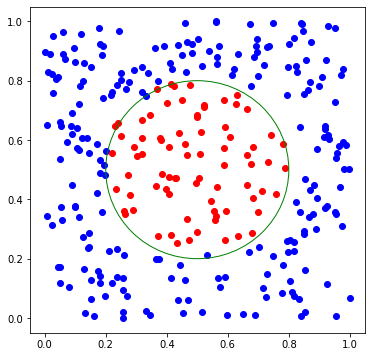

In [26]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=20, max_depth=4)
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# Кластеризация

![sklearn clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

# K-means

Алгоритм:  
1. Выбирается количество кластеров (k)  
2. Случайным образом выбираются k точек, как центры кластеров  
3. Для всех точек выборки определяется к какому центру они ближе  
4. Переместить центры кластеров в центры выборок  
5. Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения)

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

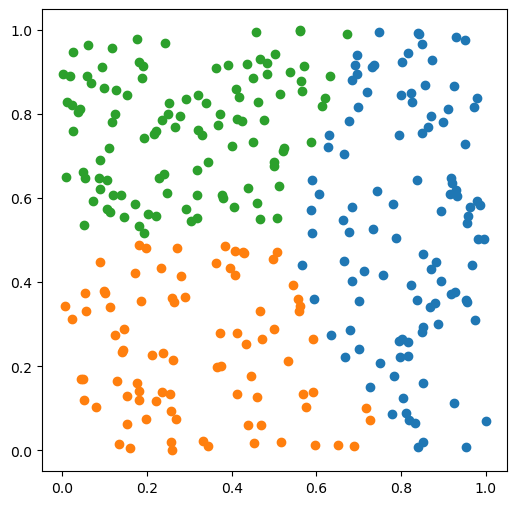

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
clusters = model.fit_predict(data_test)

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    data_ = data_test[clusters == cl]
    plt.scatter(data_[:, 0], data_[:, 1])
plt.show()

# DBSCAN

Алгоритм DBSCAN (Density-based spatial clustering of applications with noise) рассматривает кластеры как области высокой плотности, разделенные областями низкой плотности. Из-за этого довольно общего представления кластеры, найденные DBSCAN, могут иметь любую форму, в отличие от k-means, которые предполагают, что кластеры имеют выпуклую форму.  
Этот алгоритм позволяет выделять произвольное количество кластеров, основываясь на расстоянии между ними. 

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

6 кластеров


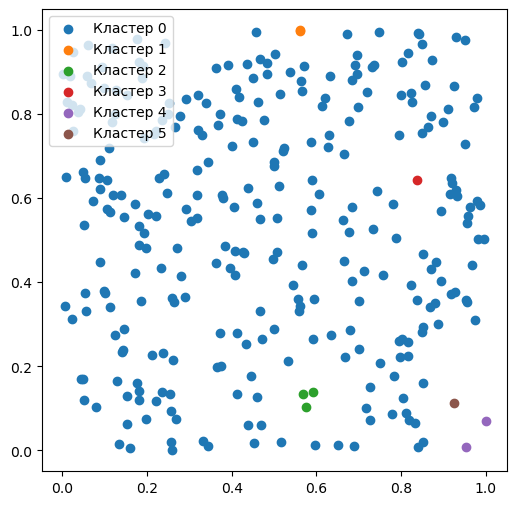

In [19]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.08, min_samples=1)
clusters = model.fit_predict(data_test)
print(np.unique(clusters).size, 'кластеров')

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    data_ = data_test[clusters == cl]
    plt.scatter(data_[:, 0], data_[:, 1], label='Кластер {}'.format(cl))
plt.legend(loc=2)
plt.show()

# Ресурсы для углублённого изучения темы

* [Открытый курс машинного обучения Open Data Science](https://habr.com/ru/company/ods/blog/322626/)
* [Видеолекции ШАД Воронцова](https://yandexdataschool.ru/edu-process/courses/machine-learning)
* [Классический курс по машинному обучению. Включает в себя как элементы классического ML так и нейронные сети](https://www.coursera.org/learn/machine-learning)
* [Лекции об инструментах, которые нужны, чтобы начать применять ML на практике](https://www.dataschool.io/)

# Задания

1. Разделите данные Титаника (*train.csv*) на тренировочную, валидационную и тестовую часть. С помощью валидационной части подберите гиперпараметры для моделей Random Forest, XGBoost, Logistic Regression и KNN. Получите точность этих моделей на тестовой части.
2. С помощью RandomForest выберите 2, 4, 8 самых важных признаков и проверьте точность моделей только на этих признаках.

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    return df_num

df_main = pd.read_csv('data/train.csv')


df_prep_x = df_main.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

df_prep_y = df_main['Survived']

df_prep_x_num = prepare_num(df_prep_x)


df_prep_x_num = df_prep_x_num.fillna(df_prep_x_num.median())


X_train, X_test, Y_train, Y_test = train_test_split(df_prep_x_num, df_prep_y, test_size= 0.15, random_state= 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= 0.15, random_state= 42)

df_main


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:

rf_parameters = {
     'n_estimators': [1, 3, 5, 7, 10],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8, 10]
}

rf_Gridd = GridSearchCV(RandomForestClassifier(random_state= 42), rf_parameters, cv= 5, scoring= 'accuracy')
rf_Gridd.fit(X_train, Y_train)
rf_bestt = rf_Gridd.best_estimator_

In [27]:
#XGBoost
XGBoost_parameters = {
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7, 9],         
    'learning_rate': [0.05, 0.1],      
}

XGBoost_Grid = GridSearchCV(XGBClassifier(random_state= 42), XGBoost_parameters, cv= 5, scoring= 'accuracy')
XGBoost_Grid.fit(X_train, Y_train)
XGBoost_best = XGBoost_Grid.best_estimator_

In [33]:
#Logistic Regression
logr_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs']
}

logr_Grid = GridSearchCV(LogisticRegression(max_iter= 1000,random_state= 42), logr_parameters, cv= 5, scoring= 'accuracy')
logr_Grid.fit(X_train, Y_train)
logr_best = logr_Grid.best_estimator_

In [29]:
#Knn
knn_parameters = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_Grid = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv= 5, scoring= 'accuracy')
knn_Grid.fit(X_train, Y_train)
knn_best = knn_Grid.best_estimator_

In [ ]:
# оценка параметров

models = {
    'RandomForest' : rf_bestt,
    'XGBoost' : XGBoost_best,
    'LogRegression' : logr_best,
    'KNN' : knn_best
}

results = {}
for name, model in models.items():
    model.fit(X_val, Y_val)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    results[name] = accuracy

results

{'RandomForest': 0.7761194029850746,
 'XGBoost': 0.8134328358208955,
 'LogRegression': 0.7985074626865671,
 'KNN': 0.7164179104477612}

In [ ]:
# Проверка на важность признаков
rf_bestt.fit(X_train, Y_train)

importances = rf_bestt.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
features
indices
features_num = [2, 4, 8]
results = {}
for num in features_num:
    ind = indices[-num:]
    feat = features[ind]

    X_train_crop = X_train[feat]
    X_test_crop = X_test[feat]

    rf_best.fit(X_train_crop, Y_train)
    y_pred = rf_best.predict(X_test_crop)
    accuracy = accuracy_score(Y_test, y_pred)
    results[str(num)] = accuracy

results

{'2': 0.7611940298507462, '4': 0.8134328358208955, '8': 0.7910447761194029}

# Лабораторная работа 9. Титаник ML
Для выполнения лабораторной необходимо скачать подготовленный [файл](https://drive.google.com/file/d/1BB__BNUiX4uS7obrGsv4rcOMB26Cr5Pb/view?usp=sharing) для задачи про Титаник: 

Необходимо использовать именно этот файл, а не из *Лабораторной #5*, так как в этом другие значения столбца label.


## Лабораторная 9.1

1. Загрузить файл, разделить его на train и test. Для test взять 10% случайно выбранных строк таблицы.
2. Обучить модели: Decision Tree, XGBoost, Logistic Regression из библиотек sklearn и xgboost. Обучить модели предсказывать столбец label по остальным столбцам таблицы.
3. Наладить замер Accuracy - доли верно угаданных ответов.
4. Точности всех моделей не должны быть ниже 85%
5. С помощью Decision Tree выбрать 2 самых важных признака и проверить точность модели, обученной только на них.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

df = pd.read_csv("data/titanic_prepared.csv", index_col=0)
Y = df['label']
X = df.drop('label', axis= 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= 0.15, random_state= 42)

In [36]:
XGBoost_parameters = {
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7, 9],         
    'learning_rate': [0.05, 0.1],      
}

XGBoost_Grid = GridSearchCV(XGBClassifier(random_state= 42), XGBoost_parameters, cv= 5, scoring= 'accuracy')
XGBoost_Grid.fit(X_train, Y_train)
XGBoost_best = XGBoost_Grid.best_estimator_

In [37]:
#Logistic Regression
logr_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs']
}

logr_Grid = GridSearchCV(LogisticRegression(max_iter= 10000,random_state= 42), logr_parameters, cv= 5, scoring= 'accuracy')
logr_Grid.fit(X_train, Y_train)
logr_best = logr_Grid.best_estimator_

In [2]:

dTree_parameters = {
'max_depth' : np.arange(2, 21),
'criterion':['gini','entropy']
}
dTree_Grid = GridSearchCV(DecisionTreeClassifier(random_state= 42), dTree_parameters, cv = 5, scoring= 'accuracy')
dTree_Grid.fit(X_train, Y_train)
dTree_best = dTree_Grid.best_estimator_

In [39]:
# оценка параметров

models = {
    'XGBoost' : XGBoost_best,
    'LogRegression' : logr_best,
    'DecisionTree' : dTree_best
}

results = {}
for name, model in models.items():
    model.fit(X_val, Y_val)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    results[name] = accuracy

results

{'XGBoost': 0.9051204819277109,
 'LogRegression': 0.8825301204819277,
 'DecisionTree': 0.9021084337349398}

In [3]:
dTree_best.fit(X_train, Y_train)

importances = dTree_best.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
features
indices
features_num = [2]
results = {}
for num in features_num:
    ind = indices[-num:]
    feat = features[ind]

    X_train_crop = X_train[feat]
    X_test_crop = X_test[feat]

    dTree_best.fit(X_train_crop, Y_train)
    y_pred = dTree_best.predict(X_test_crop)
    accuracy = accuracy_score(Y_test, y_pred)
    results[str(num)] = accuracy

results

{'2': 0.891566265060241}

## Лабораторная 9.2

1. Лабораторная 9.1 пп.1-5
2. Реализовать случайный лес в виде класса MyRandomForest. В реализации разрешается использовать DecisionTreeClassifier из библиотеки sklearn. Класс должен иметь методы fit и predict по аналогии с остальными классами библиотеки sklearn.  
    Алгоритм построения Случайного леса изложен на [Википедии](https://ru.wikipedia.org/wiki/Random_forest)  
    Необходимо обратить внимание что при построения леса используются не все доступные признаки для каждого узла дерева. А так же что в sklearn это регулируется параметрами DecisionTreeClassifier.
3. Продемонстрировать, что точность леса выше чем точность одного решающего дерева.


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from scipy.stats import mode
class MyRandomForest: 
    def __init__(self, n_estimators = 100, max_features = 'sqrt', max_depth=None, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.values

        if isinstance(Y, pd.DataFrame):
            Y = Y.values

        self.trees = []
        self.feature_indices = []
        np.random.seed(self.random_state)

        n_sample, n_features = X.shape

        if self.max_features == 'sqrt':
            max_features = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            max_features = int(np.log2(n_features))
        elif isinstance(self.max_features, (int, float)):
            max_features = int(self.max_features)
        else:
            max_features = n_features

        if self.random_state is not None:
            rng = np.random.RandomState(self.random_state)
        else:
            rng = np.random
# выбор количества признаков в зависимости от задачи регр/классификация

        for _ in range(self.n_estimators):

            tree_random_state = (
                rng.randint(0, 2**31 - 1) if self.random_state is not None else None
            )

            X_sample, Y_sample = resample(X, Y, random_state= self.random_state, n_samples= n_sample)
            
            feature_idx = np.random.choice(n_features, max_features, replace= False)
            X_sample_subset = X_sample[:, feature_idx]

            tree = DecisionTreeClassifier(
                max_depth= self.max_depth,
                min_samples_split= self.min_samples_split,
                random_state= tree_random_state,
                max_features= None)
            
            tree.fit(X_sample_subset, Y_sample)

            self.trees.append(tree)
            self.feature_indices.append(feature_idx)
        
        return self

    def predict(self, X):

        if isinstance(X, pd.DataFrame):
            X = X.values

        predictions = np.zeros((X.shape[0], self.n_estimators))
        
        for i, (tree, feature_idx) in enumerate(zip(self.trees, self.feature_indices)):
            X_subset = X[:, feature_idx]
            predictions[:, i] = tree.predict(X_subset)
        
        
        y_pred, _ = mode(predictions, axis=1)
        return y_pred.ravel()
    
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'max_features': self.max_features,
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'random_state': self.random_state
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

        
            

In [6]:
rf_parameters = {
     'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 8],
    'max_features': ['sqrt', None]
}


rf_Grid = GridSearchCV(MyRandomForest(random_state= 42), rf_parameters, cv= 3, scoring= 'accuracy')
rf_Grid.fit(X_train, Y_train)
rf_best = rf_Grid.best_estimator_



In [7]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=2, random_state=42)
tree.fit(X_train, Y_train)
Y_pred_tree = tree.predict(X_test)
tree_accuracy = accuracy_score(Y_test, Y_pred_tree)
print(f"Accuracy одного дерева: {tree_accuracy:.4f}")

y_pred_rf = rf_best.predict(X_test)
rf_accuracy = accuracy_score(Y_test, y_pred_rf)
print(f"Accuracy случайного леса: {rf_accuracy:.4f}")

print(f"Разница в точности (RF - Tree): {(rf_accuracy - tree_accuracy):.4f}")
params = rf_Grid.best_params_
params

Accuracy одного дерева: 0.9066
Accuracy случайного леса: 0.9036
Разница в точности (RF - Tree): -0.0030


{'max_depth': 7,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 200}